# **Tutorial:**

# **Least squares from scratch:**
> *Understanding Linear regression*
    
André HAM, June 2020    

## **1. Basic idea -**

Suppose we have the following data sets:

$[ y_{1},y_{2},...,y_{10}] =[0.5, \:1.8, \: 1.1,\: 2.2, \:3.3, \:5, \:6.4, \:6.4, \:8, \:7] \qquad$ and $ \qquad [ x_{1},x_{2},...,x_{10}]=[1, \:2, \:3, \:4, \:5, \:6, \:7, \:8, \:9, \:10]$.

We might want to plot them. Like this:

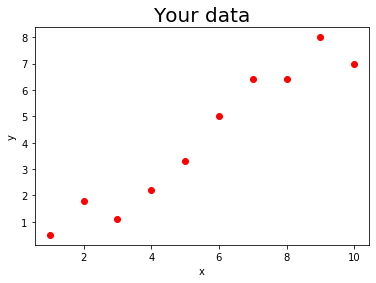

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0.5,1.8,1.1,2.2,3.3,5,6.4,6.4,8,7])

# Plot
plt.plot(x,y,'ro');

plt.title('Your data',fontsize=20)
plt.ylabel('y');
plt.xlabel('x');

Sometimes we might not expect any kind of relationship bettween $x$ and $y$, but sometimes we do (for theoretical or experimental reasons) and in these cases it is important to be able to describe it mathematically.

Notice that - ignoring some wiggle - our data behave almost linearly. In fact, we can plot several lines that could, somehow, describe our data:

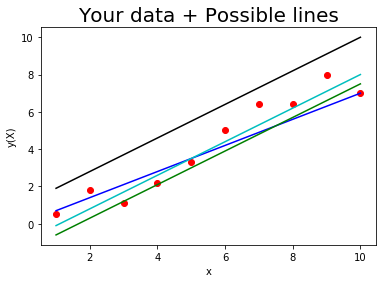

In [12]:
plt.plot(x,y,'ro', x, 0.7*x, 'b', x, 0.9*x-1.5, 'g', x, 0.9*x-1, 'c', x, 0.9*x+1, 'k');

plt.title('Your data + Possible lines',fontsize=20)
plt.ylabel('y(X)');
plt.xlabel('x');

But which one should we keep? Most of them seems "good enough", but we should not be arbitrary. So, the real question is: What is the **BEST** line that describe our data?

That is a valid question and we can put it in a more mathematical language to find the answer:

>Given the linear equation $ y(x) = a x + b $. What are the linear ($b$) and angular ($a$) coefficients that best describe our data?

Let's do it!


<font size="1">  Obs.: Obviously, if our data were perfect the best line would pass through all the points, but that is rare since real world data always have some kind of random fluctuations.

## **2. Procedure -**


### Step 1 - What is "best"?

What do we mean by the **best** line? Think about it for a second... 
Intuitively we can tell that the cyan, blue and green lines from the graph above are clearly better choices than the black one. 
So, the concept of "the best line" seems to be closely related to the *distance* bettween the data points and the chosen line. Lets focus on just one point and the cyan curve:

> **Example:** The distance bettween the point $(x_{point},y_{point})=(6,5)$ and the cyan line $y(x) = 0.9x-1 $ is shown bellow and is given by:
>
>$y_{point}-y(x_{point}) = 5 - y(6) = 5 - (0.9*6-1) = 0.6$

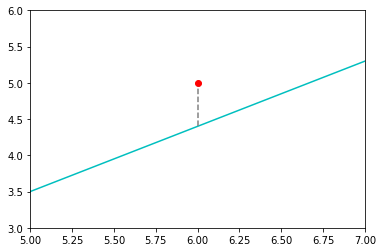

In [31]:
plt.plot([6],[5],'ro', x, 0.9*x-1, 'c'); # Plot
plt.axis([5, 7, 3, 6]); # Range shown
plt.axvline([6], 0.47 , 0.65,color='grey',linestyle='dashed'); # Vertical dashed line

This difference is commonly kwnow as *residual* $R_{i} = y_{i}-y(x_{i})$ for the i-th data point (from 1 to $N =$ # of data). Therefore, one might say: "*Aha! So the best line is the one with the lowest residual for EVERY point!*". Well, that is the spirit... However, notice that this quantity is *negative* for points bellow the curve. So, in order to avoid that, we will work only with the square of it (in our example we would obtain $R_{i}^{2}=0.6^{2}=0.36$).

>Therefore, we will call as "the best line $ y(x) = a x + b $ that describe our data" as the one in which the sum of the square of *all* residuals - $T = \Sigma_{i} R_{i}^{2}$ - is the minimum possible.

### Step 2 - Mathematical approach


Now that we know and understand our question, and the motivations of it, how can we procede?

Anyone familiarized with calculus know what we should do when we want to minimize functions: "$Derivative = 0$".

The parameters that we want to optimize are the coefficients $(a,b)$, therefore we want to solve the following equations:

> $\frac{dT}{da}=0$, $\qquad \frac{dT}{db}=0$

Let's do it together:

> (i) $\frac{dT}{da} = \frac{d}{da}\Sigma_{i} R_{i}^{2} = \frac{d}{da}\Sigma_{i}(y_{i}-y(x_{i}))^{2} = \frac{d}{da}\Sigma_{i}(y_{i}-(a x_{i} + b))^{2} = \Sigma_{i}2(y_{i}-(a x_{i} + b))(-x_{i} ) = 0$
>
> (ii) $\frac{dT}{db} = \frac{d}{db}\Sigma_{i} R_{i}^{2} = \frac{d}{db}\Sigma_{i}(y_{i}-y(x_{i}))^{2}= \frac{d}{db}\Sigma_{i}(y_{i}-(a x_{i} + b))^{2} = \Sigma_{i}2(y_{i}-(a x_{i} + b))(-1 ) = 0 $

or, after reorganizing things,

> (i) $ a \Sigma_{i} x^{2}_{i} + b \Sigma_{i} x_{i} =\Sigma_{i} y_{i}x_{i}$
>
> (ii) $ a \Sigma_{i} x_{i} + b\Sigma_{i}1 = \Sigma_{i} y_{i} $

Look, now we have a simple system: two equations and two variables! And, after solving it we will know our linear equation $ y(x) = a x + b $!

<font size="1"> Obs.: $\Sigma_{i}1 = N$ (remember that $N$ is the number of total points)

## **3. Example -**

Let's use our data set as example:

$[ y_{1},y_{2},...,y_{10}] =[0.5, \:1.8, \: 1.1,\: 2.2, \:3.3, \:5, \:6.4, \:6.4, \:8, \:7] \qquad$ and $ \qquad [ x_{1},x_{2},...,x_{10}]=[1, \:2, \:3, \:4, \:5, \:6, \:7, \:8, \:9, \:10]$.

First we have to find our system:

In [20]:
# Data
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0.5,1.8,1.1,2.2,3.3,5,6.4,6.4,8,7])

# All the necessary sum
SUMx = np.sum(x)
SUMxSquared = np.sum(np.multiply(x,x))
SUMy = np.sum(y)
SUMySquared = np.sum(np.multiply(y,y))
SUMyx = np.sum(np.multiply(y,x))


print("The system is:\n \n",SUMxSquared,"a+",SUMx,"b=",SUMyx,"\n ",SUMx,"a+",len(x),"b=",SUMy)

The system is:
 
 385 a+ 55 b= 300.7 
  55 a+ 10 b= 41.7


As we can see, our system is:

> (i) $ 385 a  + 55 b  = 300.7$
>
> (ii) $ 55 a  + 10 b  = 41.7$

Working with (ii) we have: $a = \frac{(41.7-10b)}{55}$. Then, with (i):

> (i) $385 \frac{(41.7-10b)}{55} + 55 b = 300.7 \qquad \rightarrow \qquad b = - 0.586$

Therefore,

> $a = 0.864$

So, our equation is:

> y(x) =  0.864 x - 0.586

Let's plot it with our data:

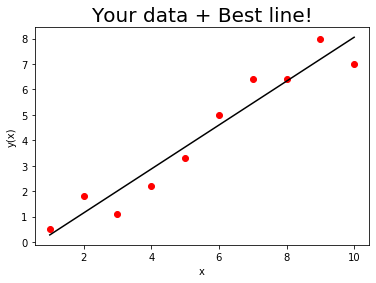

In [13]:
plt.plot(x,y,'ro', x, 0.864*x-0.586, 'k');

plt.title('Your data + Best line!',fontsize=20)
plt.ylabel('y(x)');
plt.xlabel('x');

Seems ok, right? Well, more than ok. We actualy proved that this **IS** the **best** linear equation that describe our data!

However, since we are using python let's compare our results with numpy methods:

In [33]:
from scipy import stats

slope, intercept, r_value, p_value, std_err  = stats.linregress(x,y)
# Obs.: In this tutorial language we have: slope = a and intercept = b.

print('slope = ',slope, '= a \n \n','intercept = ',intercept, '= b\n')

slope =  0.8648484848484851 = a 
 
 intercept =  -0.5866666666666678 = b



Compare with our calculations... As we can see, both results agree!

### **3.1 Checking everything with an extra example -**

If you are still not convinced with our procedure let's check with the most simple example. Considere this data set:

$[ y_{1},y_{2},...,y_{10}] =[0, \:10] \qquad$ and $ \qquad [ x_{1},x_{2}]=[0, \:10]$.

I belive that you can guess the best possible line, right?

> $y(x) = x$

Lets plot them:

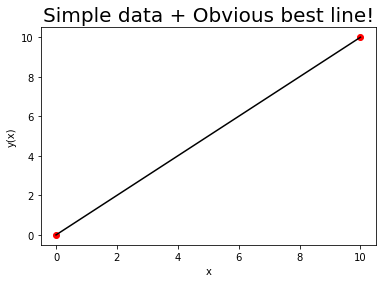

In [17]:
# Data
xSimple = np.array([0,10])
ySimple = np.array([0,10])

# Plot
plt.plot(xSimple,ySimple,'ro', xSimple, xSimple, 'k');

plt.title('Simple data + Obvious best line!',fontsize=20)
plt.ylabel('y(x)');
plt.xlabel('x');

If our procedure is correct we should obtain $a = 1$ and $b = 0$. Let's calcule our system:

In [18]:
# Data
xSimple = np.array([0,10])
ySimple = np.array([0,10])

# All the necessary sum
SUMxSimple = np.sum(xSimple)
SUMxSimpleSquared = np.sum(np.multiply(xSimple,xSimple))
SUMySimple = np.sum(ySimple)
SUMySimpleSquared = np.sum(np.multiply(ySimple,ySimple))
SUMySimplexSimple = np.sum(np.multiply(ySimple,xSimple))


print("The system is:\n \n",SUMxSimpleSquared,"a+",SUMxSimple,"b=",SUMySimplexSimple,"\n ",SUMxSimple,"a+",len(xSimple),"b=",SUMySimple)

The system is:
 
 100 a+ 10 b= 100 
  10 a+ 2 b= 10


As we can see, our system is:

> (i) $ 100 a  + 10 b  = 100$
>
> (ii) $ 10 a  + 2 b  = 10$

Working with (ii) we have: $a = \frac{(10-2b)}{10}$. Then, with (i):

> (i) $100\frac{(10-2b)}{10} + 10 b = 100 \qquad \rightarrow \qquad b = 0$

Therefore,

> $a = 1$

Surprise! Our equation is exactly what we expected:

> y(x) =  x


## **4. Final remarks -**

Linear regression methods are very important tools since they can be found everywhere. The simplicity of the least squares method contrasts with what we would expect from complex mathematical models. However, keep in mind that this is the simplest case of polynomial regression (remember, we are modeling our data with a first degree polynomial). Fortunately the generalization is straighfoward and most of these ideas could be applied for higher degrees and dimensions.

As always, hope it helps!